In [ ]:
!pip install tensorflow matplotlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # suppress TensorFlow warnings
print("✅ Packages installed and warnings suppressed")


✅ Packages installed and warnings suppressed


In [ ]:


import tensorflow as tf
import os
import zipfile

# Download the dataset zip file
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=False)

# Extract the dataset to a folder named 'cats_and_dogs_filtered'
extract_path = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(zip_path))
    print(f"Dataset extracted to: {extract_path}")
else:
    print(f"Dataset already extracted at: {extract_path}")

# Check directory structure
print("Contents of extracted folder:")
print(os.listdir(extract_path))

# Define train and validation directories
train_dir = os.path.join(extract_path, 'train')
validation_dir = os.path.join(extract_path, 'validation')

print("Train directory contents:", os.listdir(train_dir))
print("Validation directory contents:", os.listdir(validation_dir))

# Setup image data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(IMG_SIZE, IMG_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                       target_size=(IMG_SIZE, IMG_SIZE),
                                                       batch_size=BATCH_SIZE,
                                                       class_mode='binary')

print("✅ Dataset loaded and generators ready.")


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset extracted to: /root/.keras/datasets/cats_and_dogs_filtered
Contents of extracted folder:
['train', 'validation', 'vectorize.py']
Train directory contents: ['cats', 'dogs']
Validation directory contents: ['cats', 'dogs']
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
✅ Dataset loaded and generators ready.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 10  # You can increase later if you want

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.4921 - loss: 1.0819 - val_accuracy: 0.5070 - val_loss: 0.6904
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.5291 - loss: 0.6891 - val_accuracy: 0.5740 - val_loss: 0.6582
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.6332 - loss: 0.6508 - val_accuracy: 0.6480 - val_loss: 0.6344
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.6378 - loss: 0.6403 - val_accuracy: 0.6880 - val_loss: 0.5967
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.6506 - loss: 0.6352 - val_accuracy: 0.6570 - val_loss: 0.6254
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6797 - loss: 0.5851 - val_accuracy: 0.6850 - val_loss: 0.5955
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7014 - loss: 0.5962 - val_accuracy: 0.6720 - val_loss: 0.6030
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.7161 - loss: 0.5734 - val_accuracy: 0.7250 - v

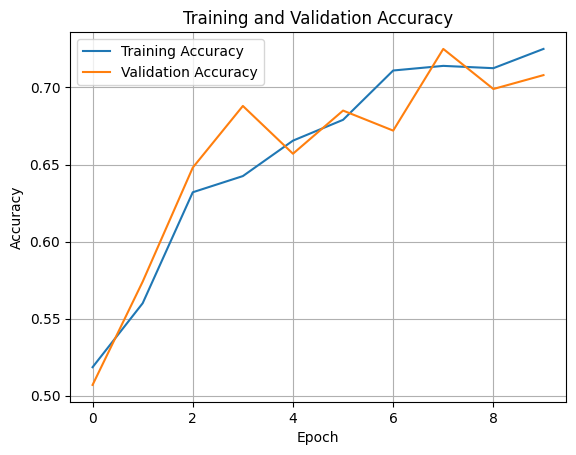

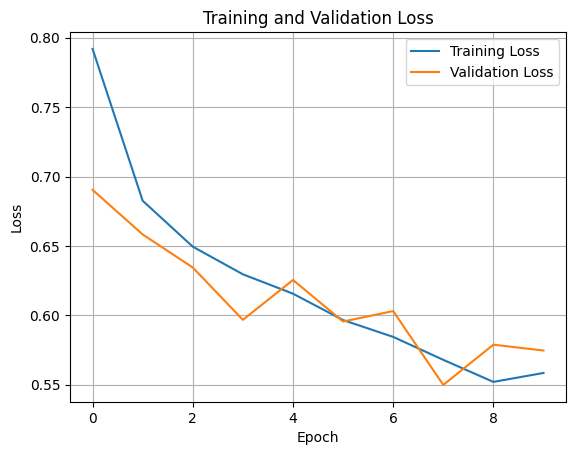

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.save("cat_dog_classifier_model.h5")
print("✅ Model saved as cat_dog_classifier_model.h5")


✅ Model saved as cat_dog_classifier_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


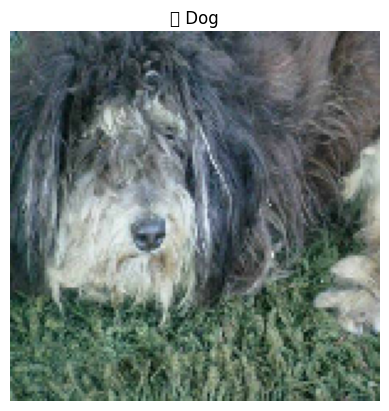

🔍 Prediction score: 0.85


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import random
import os

# Choose a random image from the validation set (cats or dogs)
sample_folder = os.path.join(validation_dir, random.choice(['cats', 'dogs']))
sample_image_path = os.path.join(sample_folder, random.choice(os.listdir(sample_folder)))

# Load and preprocess the image
img = image.load_img(sample_image_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict using the model
prediction = model.predict(img_array)[0][0]

# Show the image
plt.imshow(img)
plt.axis('off')
plt.title("🐶 Dog" if prediction > 0.5 else "🐱 Cat")
plt.show()

print(f"🔍 Prediction score: {prediction:.2f}")

